In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Pipeline is akin to a Sequential class in tf where architecture of model is defined
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Columns of the data
* longitude: continuous. 
* latitude: continuous.
* housingMedianAge: continuous. 
* totalRooms: continuous. 
* totalBedrooms: continuous. 
* population: continuous. 
* households: continuous. 
* medianIncome: continuous. 
* medianHouseValue: continuous. 

"median income",
"median house age",
"avg no. of rooms/household",
"avg no. of bedrooms/household",
"block group population",
"avg no of household members",
"block group latitude",
"block group longitude"

In [19]:
data = pd.read_csv('./CaliforniaHousing/cal_housing.data', sep=',', header=None)
data.rename(columns={0: 'longitude', 1: 'latitude', 2: 'housingMedianAge', 3: 'totalRooms', 4: 'totalBedrooms', 5: 'population', 6: 'households', 7: 'medianIncome', 8: 'medianHouseValue'}, inplace=True)
data.head()



,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [20]:
data.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
X, Y = data.loc[:, 'longitude':'medianHouseValue'].to_numpy(), data.loc[:, 'medianHouseValue'].to_numpy()
print(f"{X[:5]}\n{Y[:5]}")

[[-1.2223e+02  3.7880e+01  4.1000e+01  8.8000e+02  1.2900e+02  3.2200e+02
   1.2600e+02  8.3252e+00  4.5260e+05]
 [-1.2222e+02  3.7860e+01  2.1000e+01  7.0990e+03  1.1060e+03  2.4010e+03
   1.1380e+03  8.3014e+00  3.5850e+05]
 [-1.2224e+02  3.7850e+01  5.2000e+01  1.4670e+03  1.9000e+02  4.9600e+02
   1.7700e+02  7.2574e+00  3.5210e+05]
 [-1.2225e+02  3.7850e+01  5.2000e+01  1.2740e+03  2.3500e+02  5.5800e+02
   2.1900e+02  5.6431e+00  3.4130e+05]
 [-1.2225e+02  3.7850e+01  5.2000e+01  1.6270e+03  2.8000e+02  5.6500e+02
   2.5900e+02  3.8462e+00  3.4220e+05]]
[452600. 358500. 352100. 341300. 342200.]


In [22]:
X_trains, X_tests, Y_trains, Y_tests = train_test_split(X, Y, test_size=0.3, random_state=0)
print('X_trains: {} \n'.format(X_trains))
print('Y_trains: {} \n'.format(Y_trains))
print('X_tests: {} \n'.format(X_tests))
print('Y_tests: {} \n'.format(Y_tests))

X_trains: [[-1.1979e+02  3.6730e+01  5.2000e+01 ...  4.0000e+01  1.9750e+00
   4.7500e+04]
 [-1.2221e+02  3.7770e+01  4.3000e+01 ...  2.7700e+02  2.2604e+00
   1.0000e+05]
 [-1.1804e+02  3.3870e+01  1.7000e+01 ...  3.6400e+02  6.2990e+00
   2.8580e+05]
 ...
 [-1.2190e+02  3.6580e+01  3.1000e+01 ...  3.9300e+02  3.1977e+00
   2.8930e+05]
 [-1.1793e+02  3.3620e+01  3.4000e+01 ...  4.6800e+02  5.6315e+00
   4.8460e+05]
 [-1.1556e+02  3.2800e+01  1.5000e+01 ...  2.9800e+02  1.3882e+00
   6.9400e+04]] 

Y_trains: [ 47500. 100000. 285800. ... 289300. 484600.  69400.] 

X_tests: [[-1.1705e+02  3.2580e+01  2.2000e+01 ...  3.7100e+02  4.1518e+00
   1.3690e+05]
 [-1.1797e+02  3.3920e+01  3.2000e+01 ...  4.2900e+02  5.7796e+00
   2.4130e+05]
 [-1.2184e+02  3.8650e+01  2.9000e+01 ...  5.3400e+02  4.3487e+00
   2.0070e+05]
 ...
 [-1.1791e+02  3.3890e+01  3.0000e+01 ...  2.1600e+02  7.8750e+00
   3.5190e+05]
 [-1.1964e+02  3.6560e+01  3.4000e+01 ...  9.7000e+01  2.0658e+00
   9.2500e+04]
 [-1.2199e+

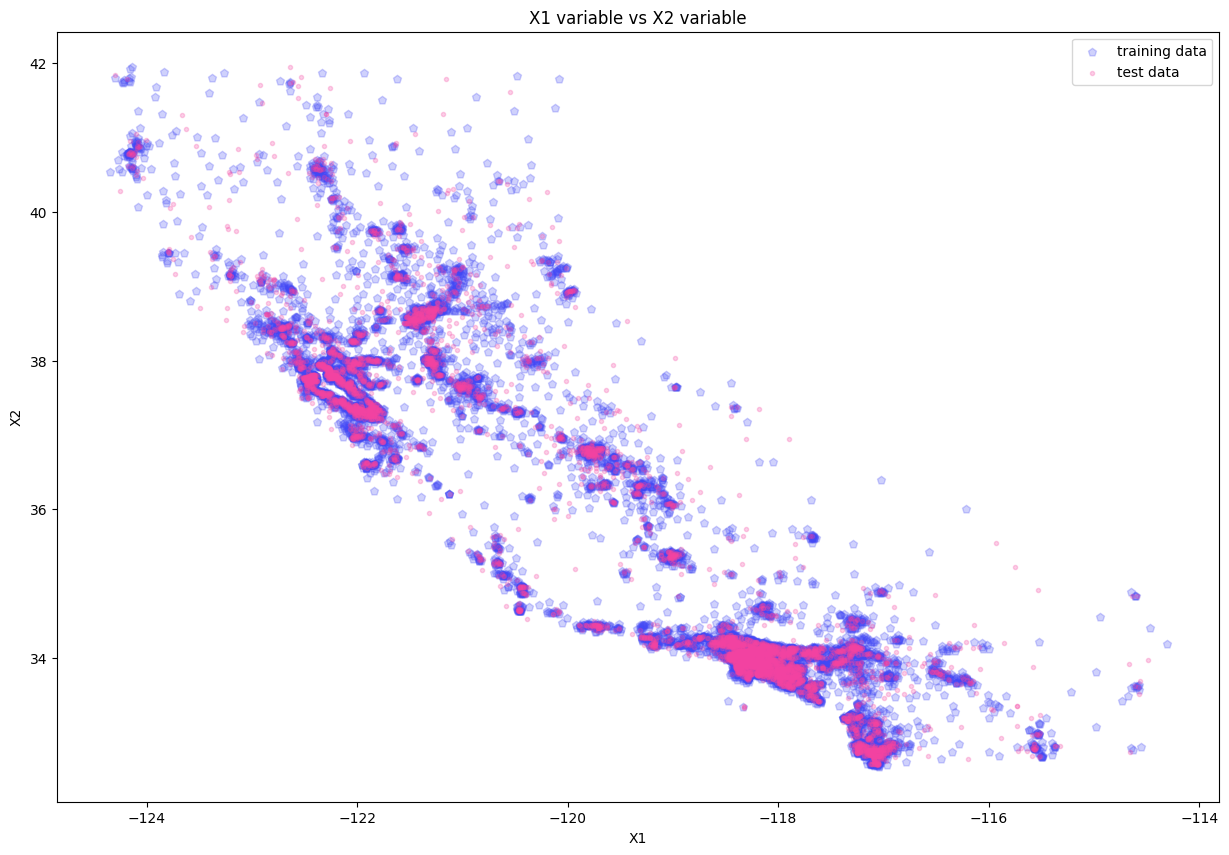

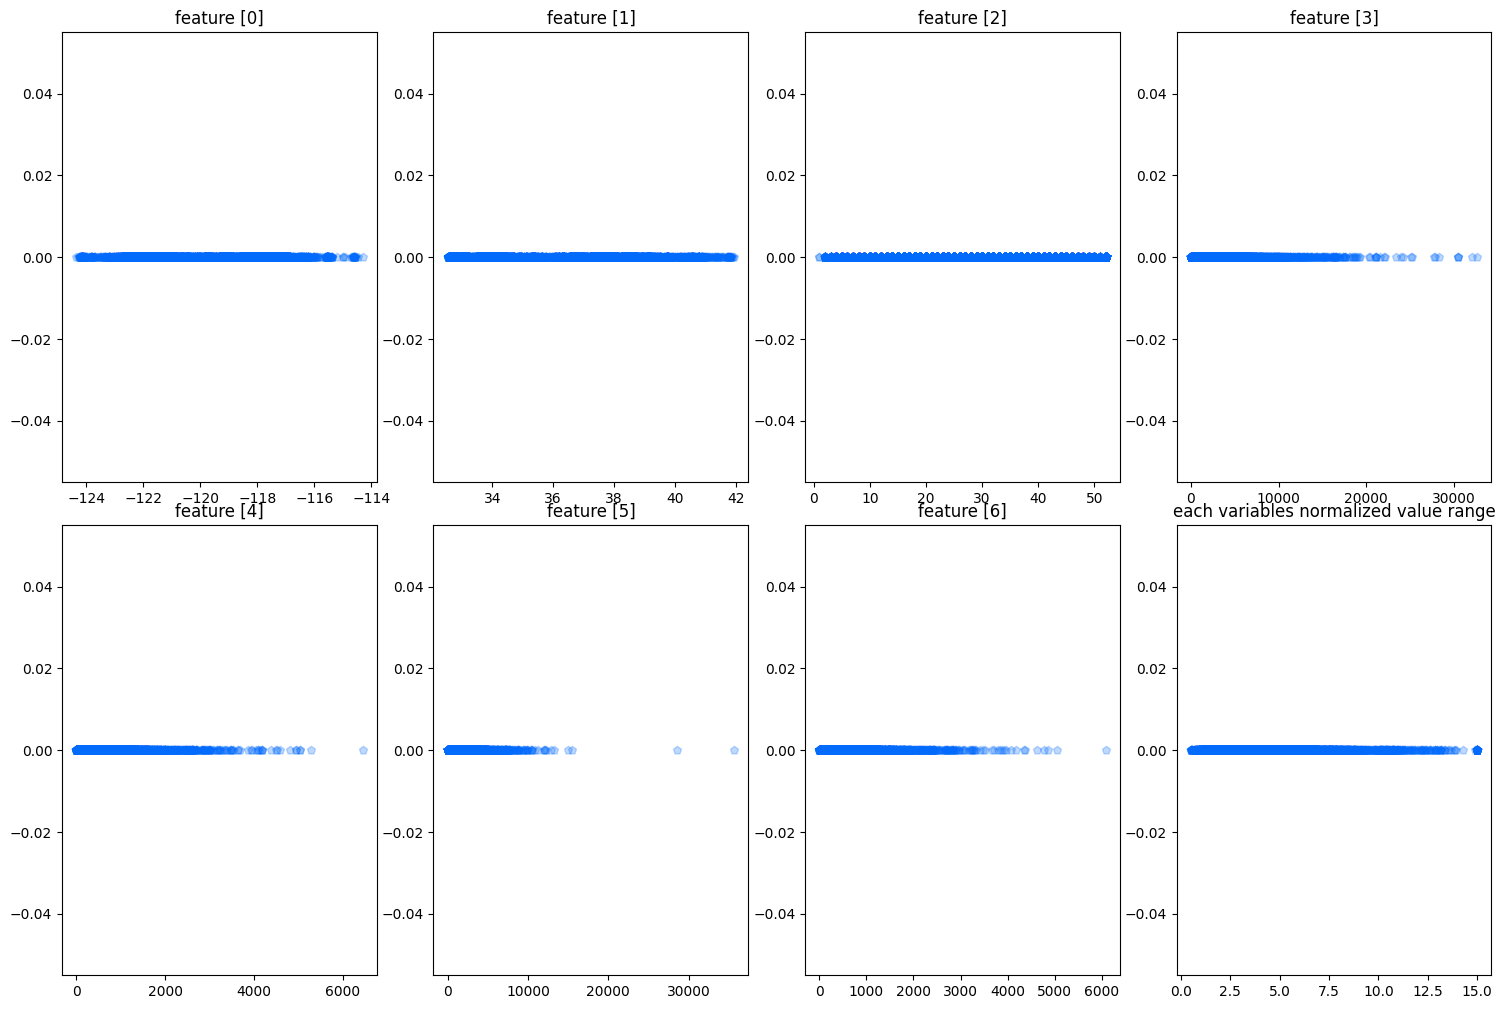

In [23]:
def plot_data(X_trains, X_tests, img_title: str=None):
    fig = plt.figure(figsize=(15, 10))
    axis = fig.add_subplot()

    axis.scatter(X_trains[:, 0], X_trains[:, 1], alpha=0.25, c='#4248f5', marker='p', label='training data')
    axis.scatter(X_tests[:, 0], X_tests[:, 1], alpha=0.25, c='#f542a1', marker='.', label='test data')

    if img_title is not None:
        plt.savefig(f'./figures & images/{img_title}.png')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(img_title)
    plt.legend()
    plt.show()

def analyze(X_trains, X_tests, n_row_plots, m_col_plots, img_title: str=None):
    # sees the range where each feature lies
    fig, axes = plt.subplots(n_row_plots, m_col_plots, figsize=(15, 10))
    fig.tight_layout(pad=1)

    # no. of instances and features
    num_instances = X_trains.shape[0]
    num_features = X_trains.shape[1]

    # feature names
    feature_names = ["median income", "median house age", "avg no. of rooms/household", "avg no. of bedrooms/household", 
    "block group population", "avg no of household members", "block group latitude", "block group longitude"]
    
    zeros = np.zeros((num_instances,))
    
    # how do I keep the title without it being removed after plt.show()
    for feature_col_i, axis in enumerate(axes.flat):
        # print(feature_col_i)
        curr_feature = X_trains[:, feature_col_i].reshape(-1)
        # print(curr_feature)
        # print(curr_feature.shape)
        axis.scatter(curr_feature, zeros, alpha=0.25, marker='p', c='#036bfc')
        # print(feature_names[feature_col_i])
        
        # if feature_col_i % 8 == 0:
        #     axis.set_title(feature_names[feature_col_i])
        axis.set_title(f"feature [{feature_col_i}]")
    
    if img_title is not None:
        plt.savefig(f'./figures & images/{img_title}.png')
        
    plt.title(img_title)
    plt.show()

plot_data(X_trains, X_tests, 'X1 variable vs X2 variable')
analyze(X_trains, X_tests, 2, 4, 'each variables normalized value range')

# Linear Regression Model

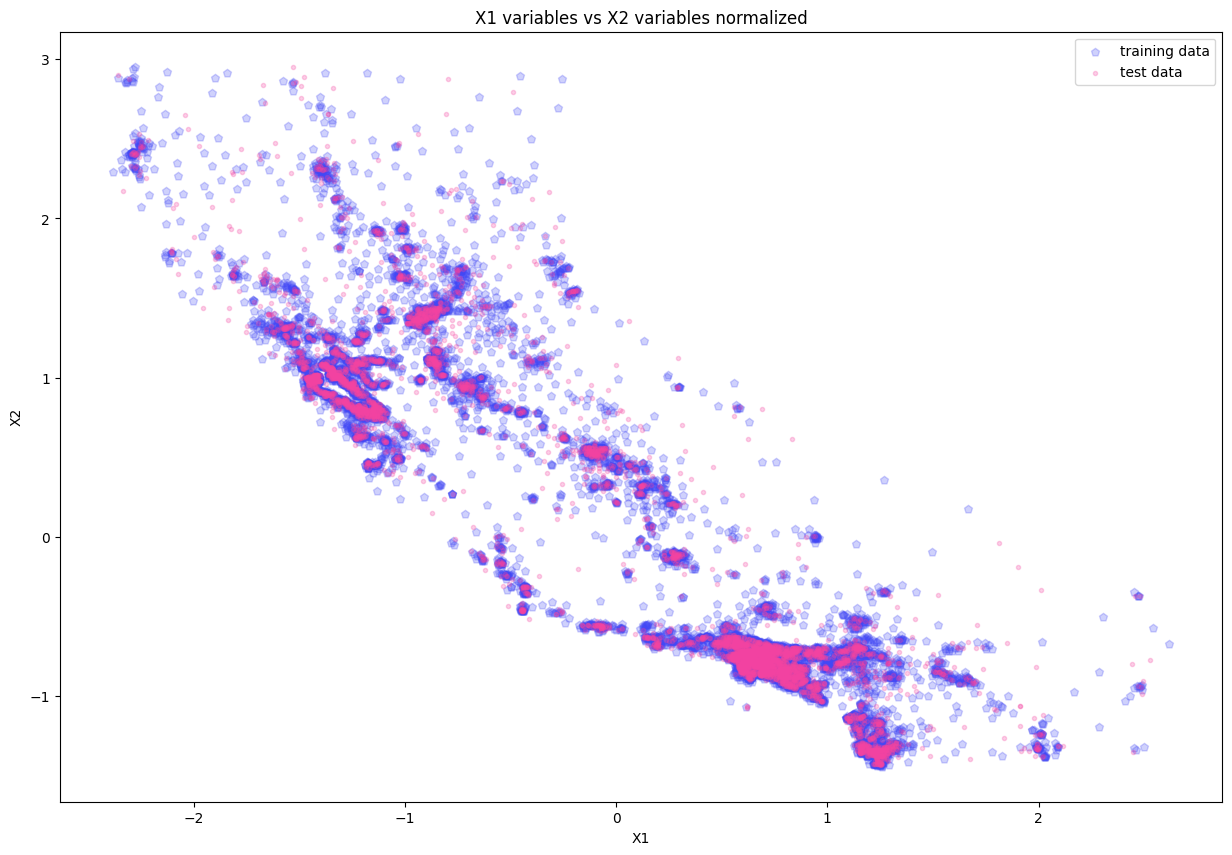

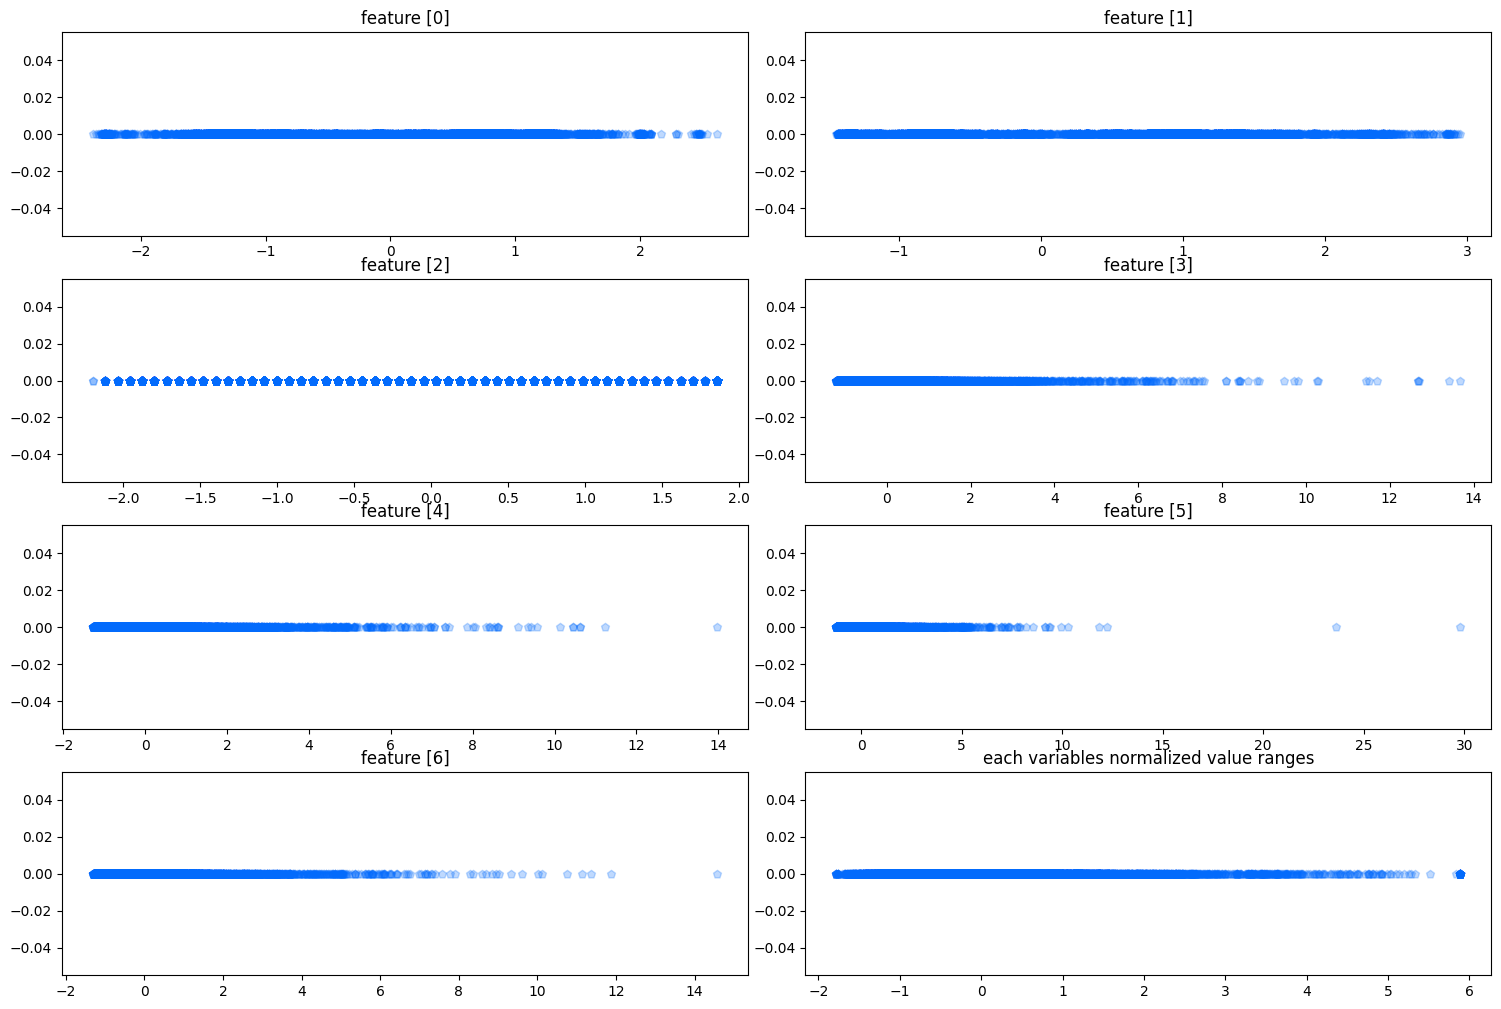

In [24]:
# standardize data or normalize both training and test data
# note that self.fit_transform() should only be used absolutely
# for the training dataset only
scaler = StandardScaler()
X_trains_normed = scaler.fit_transform(X_trains)

# note that self.transform() is used specifically 
# for both test and development data sets only
X_tests_normed = scaler.transform(X_tests)

plot_data(X_trains_normed, X_tests_normed, 'X1 variables vs X2 variables normalized')
analyze(X_trains_normed, X_tests_normed, 4, 2, 'each variables normalized value ranges')

In [25]:


# train model
model = LinearRegression()
model.fit(X_trains_normed, Y_trains)

# get results of training data
Y_preds = model.predict(X_trains_normed)
print(f"mean squared error for training data: {mean_squared_error(Y_trains, Y_preds)}")
print(f"root mean squared error for training data: {math.sqrt(mean_squared_error(Y_trains, Y_preds))}")

# get results of training data
Y_preds = model.predict(X_tests_normed)
print(f"mean squared error for test data: {mean_squared_error(Y_tests, Y_preds)}")
print(f"root mean squared error for test data: {math.sqrt(mean_squared_error(Y_tests, Y_preds))}")

mean squared error for training data: 1.0773346863669158e-20
root mean squared error for training data: 1.03794734277174e-10
mean squared error for test data: 1.0753980638799995e-20
root mean squared error for test data: 1.037014013347939e-10


In [26]:
# train a linear regression model with L2
# regularization to see if error goes down
model = Ridge(alpha=1.0)
model.fit(X_trains_normed, Y_trains)

# get results of training data
Y_preds = model.predict(X_trains_normed)
print(f"mean squared error for training data: {mean_squared_error(Y_trains, Y_preds)}")
print(f"root mean squared error for training data: {math.sqrt(mean_squared_error(Y_trains, Y_preds))}")

# get results of training data
Y_preds = model.predict(X_tests_normed)
print(f"mean squared error for test data: {mean_squared_error(Y_tests, Y_preds)}")
print(f"root mean squared error for test data: {math.sqrt(mean_squared_error(Y_tests, Y_preds))}")

mean squared error for training data: 176.59621572111226
root mean squared error for training data: 13.288950888656045
mean squared error for test data: 180.97632123077275
root mean squared error for test data: 13.45274400376268


# Polynomial Regression

In [27]:
# use a function now that engineers new features out of the dataset
# such that it mimics a polynomial equation with a degree in this case of 2
# since data is parabolic
poly = PolynomialFeatures(degree=2, include_bias=False)
X_trains_enged = poly.fit_transform(X_trains)
X_tests_enged = poly.transform(X_tests)

# view and see the shape of teh dataset which as observed 
# now contains 44 features
print(X_trains_enged, X_trains_enged.shape)
print(X_tests_enged, X_tests_enged.shape)

[[-1.19790000e+02  3.67300000e+01  5.20000000e+01 ...  3.90062500e+00
   9.38125000e+04  2.25625000e+09]
 [-1.22210000e+02  3.77700000e+01  4.30000000e+01 ...  5.10940816e+00
   2.26040000e+05  1.00000000e+10]
 [-1.18040000e+02  3.38700000e+01  1.70000000e+01 ...  3.96774010e+01
   1.80025420e+06  8.16816400e+10]
 ...
 [-1.21900000e+02  3.65800000e+01  3.10000000e+01 ...  1.02252853e+01
   9.25094610e+05  8.36944900e+10]
 [-1.17930000e+02  3.36200000e+01  3.40000000e+01 ...  3.17137923e+01
   2.72902490e+06  2.34837160e+11]
 [-1.15560000e+02  3.28000000e+01  1.50000000e+01 ...  1.92709924e+00
   9.63410800e+04  4.81636000e+09]] (14448, 54)
[[-1.17050000e+02  3.25800000e+01  2.20000000e+01 ...  1.72374432e+01
   5.68381420e+05  1.87416100e+10]
 [-1.17970000e+02  3.39200000e+01  3.20000000e+01 ...  3.34037762e+01
   1.39461748e+06  5.82256900e+10]
 [-1.21840000e+02  3.86500000e+01  2.90000000e+01 ...  1.89111917e+01
   8.72784090e+05  4.02804900e+10]
 ...
 [-1.17910000e+02  3.38900000e+0

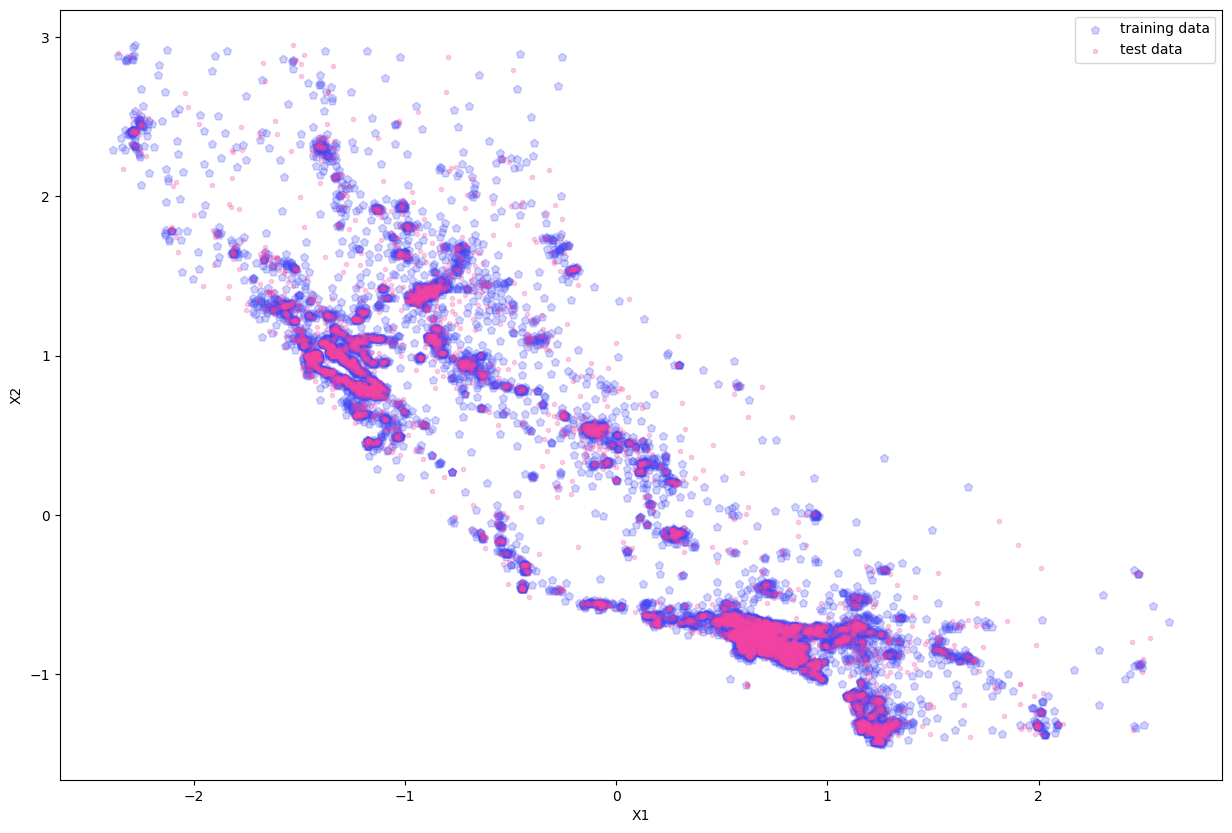

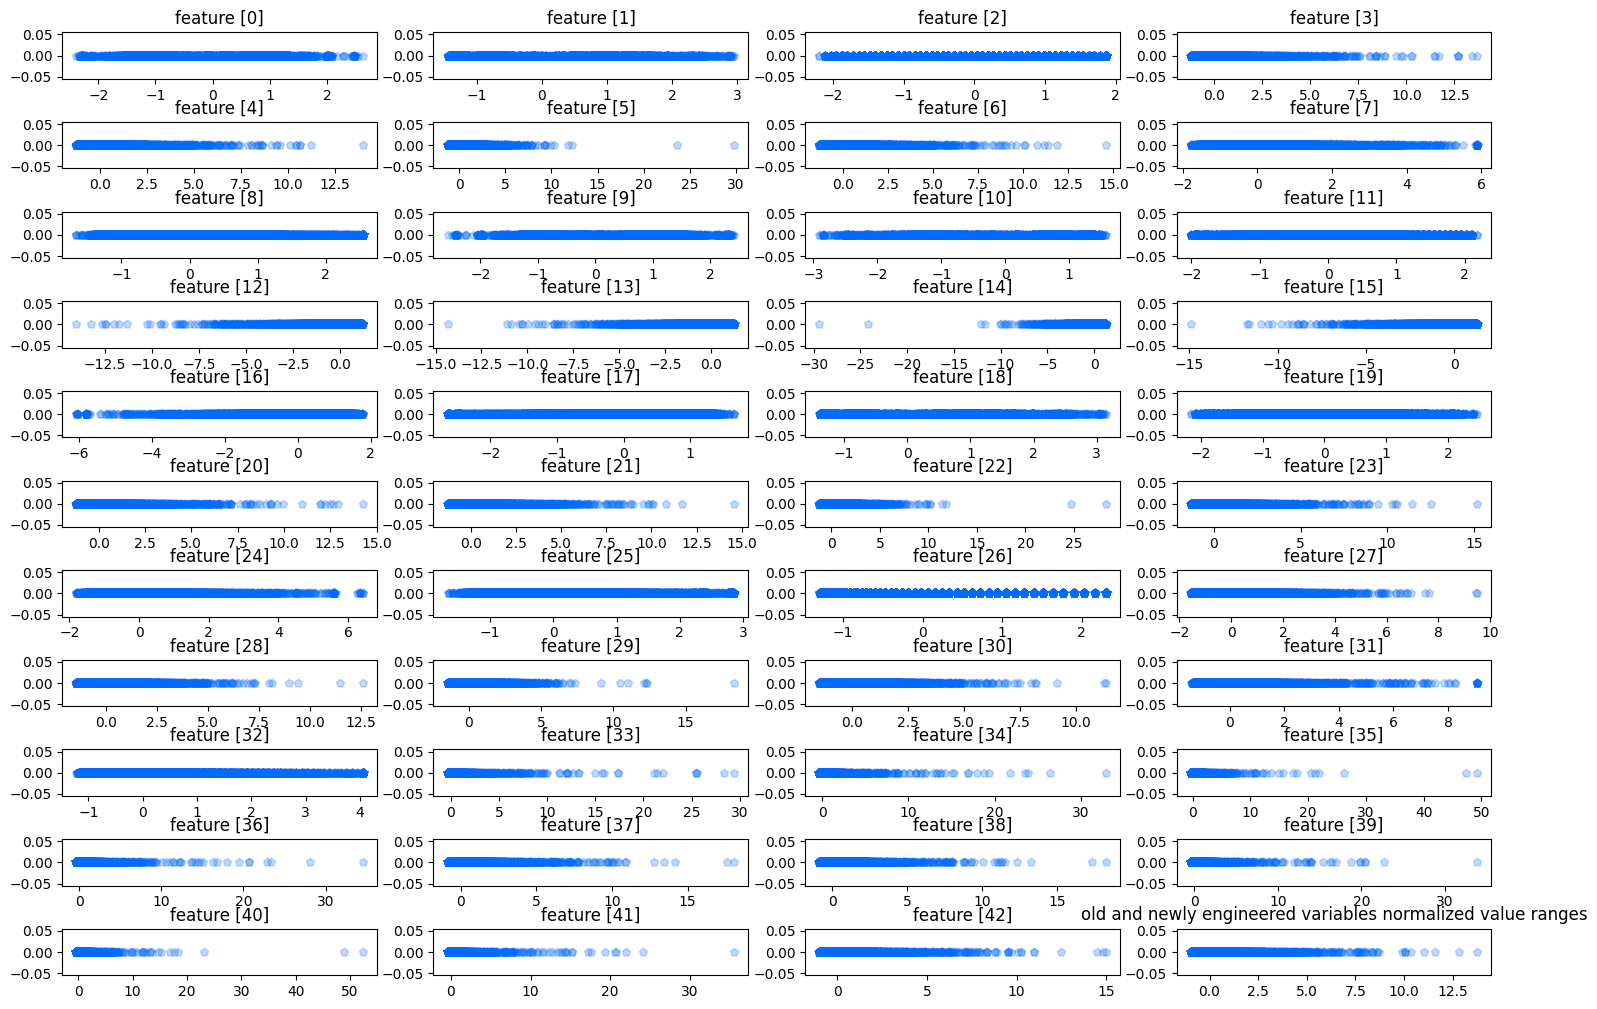

In [28]:
# standardize/normalize again the data both training and test data
scaler = StandardScaler()
X_trains_normed = scaler.fit_transform(X_trains_enged)
X_tests_normed = scaler.transform(X_tests_enged)

plot_data(X_trains_normed, X_tests_normed)
analyze(X_trains_normed, X_tests_normed, 11, 4, 'old and newly engineered variables normalized value ranges')

## We will see in this pipeline that using polynomial regression generalizes well with our data, due to it giving a lower RMSE than doing otherwise, by only using a mean normalizing, regression pipeline
* we see that our RMSE for our training data is 63136.122482013845 compared to our previous pipeline which gave an RMSE of 69274.82890818657
* we see that our RMSE for our development data is 63818.38472948077 slightly higher than our current training data cost but better than in our previous pipeline which gave an RMSE of 70128.18813948713

In [29]:
# instantiate linear regression model again
# and fit a line to the data
model = LinearRegression()
model.fit(X_trains_normed, Y_trains)

# get results of training data
Y_preds = model.predict(X_trains_normed)
print(f"mean squared error for training data: {mean_squared_error(Y_trains, Y_preds)}")
print(f"root mean squared error for training data: {math.sqrt(mean_squared_error(Y_trains, Y_preds))}")

# get results of training data
Y_preds = model.predict(X_tests_normed)
print(f"mean squared error for test data: {mean_squared_error(Y_tests, Y_preds)}")
print(f"root mean squared error for test data: {math.sqrt(mean_squared_error(Y_tests, Y_preds))}")

mean squared error for training data: 4.14921416677082e-20
root mean squared error for training data: 2.0369619944345599e-10
mean squared error for test data: 3.957355165707646e-20
root mean squared error for test data: 1.989310223597025e-10


In [30]:
# instead of instantiating PolynomialFeatures, StandardScaler, and
# LinearRegression and getting each their outputs to pass to the next class
# we can use Pipeline to reduce redundancy 

# this block of code is akin or equivalent to the aforementioned code
# that implemented a polynomial regression model
poly = PolynomialFeatures(degree=2, include_bias=False)
scaler = StandardScaler()
model = Ridge(alpha=0.0001)

poly_model = Pipeline([
    ("engineered features", poly),
    ("input normalizer|standardizer", scaler),
    ("linear regression model", model),
])

poly_model.fit(X_trains, Y_trains)

# get results of training data
Y_preds = poly_model.predict(X_trains)
print(f"mean squared error for training data: {mean_squared_error(Y_trains, Y_preds)}")
print(f"root mean squared error for training data: {math.sqrt(mean_squared_error(Y_trains, Y_preds))}")

# get results of training data
Y_preds = poly_model.predict(X_tests)
print(f"mean squared error for test data: {mean_squared_error(Y_tests, Y_preds)}")
print(f"root mean squared error for test data: {math.sqrt(mean_squared_error(Y_tests, Y_preds))}")


# # instead of LinearRegression we use Ridge to train a linear regression 
# # model with L2 regularization to see if error goes down
# model = Ridge(alpha=0.7)
# model.fit(X_trains_normed, Y_trains)

# # get results of training data
# Y_preds = model.predict(X_trains_normed)
# print(f"mean squared error for training data: {mean_squared_error(Y_trains, Y_preds)}")
# print(f"root mean squared error for training data: {math.sqrt(mean_squared_error(Y_trains, Y_preds))}")

# # get results of training data
# Y_preds = model.predict(X_tests_normed)
# print(f"mean squared error for test data: {mean_squared_error(Y_tests, Y_preds)}")
# print(f"root mean squared error for test data: {math.sqrt(mean_squared_error(Y_tests, Y_preds))}")

mean squared error for training data: 0.04632707102308496
root mean squared error for training data: 0.2152372435780689
mean squared error for test data: 0.05680620731192971
root mean squared error for test data: 0.23834052805162975


In conclusion what can be deduced from the aforementioned code is that when engineering new features or turning the data in such that it mimics a polynomial equation rather than a linear equation, the process is always first and foremost, and then comes only normalizing the newly engineered features and then training the model